<a href="https://colab.research.google.com/github/HaticeTuran/Data-Analysis-Term-Project/blob/main/INF506_Project_CeydaBaloglu_HaticeTuran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Top Hits Spotify from 2000-2019** 

Autorinnen 


1.   Hatice Turan 190503011
2.   Ceyda Baloğlu 170503036




In [32]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import time
import seaborn as sns


In [33]:
path = './songs_normalize.csv'

In [34]:
df = pd.read_csv(path)
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


Datentypen für Columns von Data Frame 'df'

In [35]:
df.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

Einige detalierte Informationen über den Dataset

In [36]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


Die Namen der Sängerinnen und Sänger(Artists) und die Anzahl der Lieder sind unten angegeben.

In [37]:
df['artist'].value_counts()

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: artist, Length: 835, dtype: int64

Die 5 Künstler mit den meisten Songs sind unten angegeben.

In [38]:
print(type(df['artist'].value_counts().head()))
print(df['artist'].value_counts().head())
p = df['artist'].value_counts().head()
s = []
# explicit:Der Text oder Inhalt eines Liedes oder eines Musikvideos enthält eines 
# oder mehrere der Kriterien, die als anstößig oder für Kinder ungeeignet angesehen werden könnten.
s.append(len(df[(df['explicit']==True) & (df['artist'] == 'Rihanna')]))
s.append(len(df[(df['explicit']==True) & (df['artist'] == 'Drake')]))
s.append(len(df[(df['explicit']==True) & (df['artist'] == 'Eminem')]))
s.append(len(df[(df['explicit']==True) & (df['artist'] == 'Calvin Harris')]))
s.append(len(df[(df['explicit']==True) & (df['artist'] == 'Britney Spears')]))
print(s)

<class 'pandas.core.series.Series'>
Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
Name: artist, dtype: int64
[8, 18, 20, 1, 1]


Top Hit 5 Sänger's Lieder, die als anstößig oder ungeeignet für Kinder angesehen werden könnten.

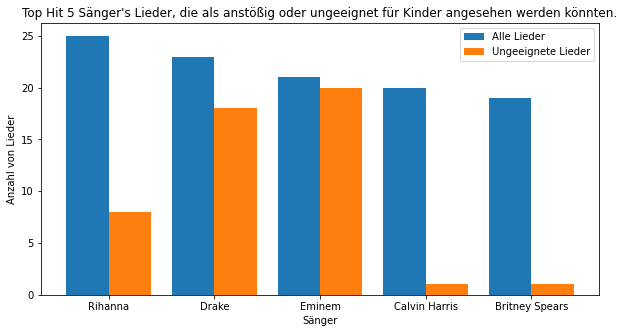

In [39]:
fig = plt.figure(figsize = (10, 5))

artists =list(["Rihanna","Drake","Eminem","Calvin Harris","Britney Spears"])
songs = list(p.iloc(0))
values = list(s)

X_axis = np.arange(len(artists))
  
plt.bar(X_axis - 0.2, songs, 0.4, label = 'Alle Lieder')
plt.bar(X_axis + 0.2, values, 0.4, label = 'Ungeeignete Lieder')
  
plt.xticks(X_axis, artists)
plt.xlabel("Sänger")
plt.ylabel("Anzahl von Lieder")
plt.title("Top Hit 5 Sänger's Lieder, die als anstößig oder ungeeignet für Kinder angesehen werden könnten.")
plt.legend()
plt.show()

Beliebte, aber ungeeignete Lieder für Kinder

In [40]:
popular_lieder = df[df['popularity'] > 70 ]
x = len(popular_lieder)
print(x)
y = len(popular_lieder[popular_lieder['explicit'] == True]) 
print(y)
print("Wie viel Prozent der populären Lieder für Kinder ungeeignet sind?")
print(y/x*100)

671
211
Wie viel Prozent der populären Lieder für Kinder ungeeignet sind?
31.445603576751118


Grafiken von Tempo

Text(0.5, 1, 'Beziehungsdiagramm zwischen Tempo und Valenz')

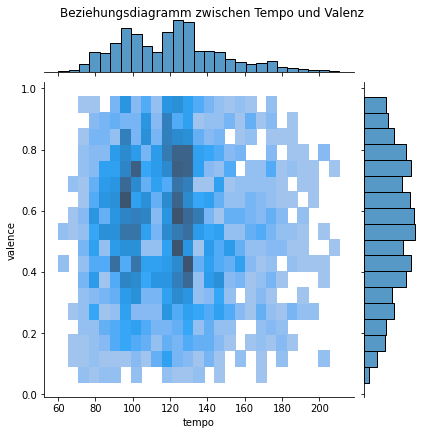

In [41]:
c = sns.jointplot(data=df, x="tempo", y="valence", kind="hist")
c.fig.suptitle('Beziehungsdiagramm zwischen Tempo und Valenz',y=1)

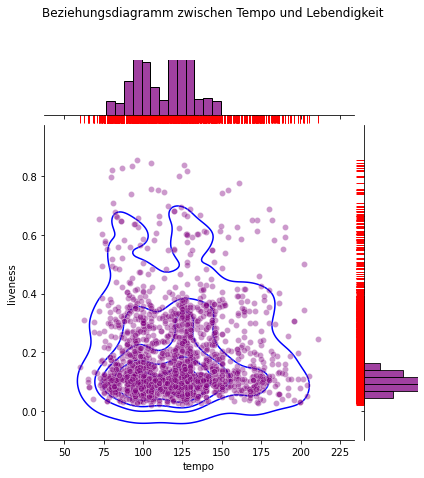

In [42]:
g = sns.jointplot(data=df, x="tempo", y="liveness", alpha = 0.4,color="purple")
g.fig.suptitle('Beziehungsdiagramm zwischen Tempo und Lebendigkeit', y=1.1)
g.plot_joint(sns.kdeplot, color="blue", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

Diejenigen mit mehr als einer Genre von Lied,
in separate Spalten aufteilen und codieren.

In [43]:
new = df["genre"].str.split(",", n=3, expand =True)
new

,0,1,2,3
0,pop,None,None,None
1,rock,pop,None,None
2,pop,country,None,None
3,rock,metal,None,None
4,pop,None,None,None
...,...,...,...,...
1995,pop,None,None,None
1996,pop,None,None,None
1997,hip hop,country,None,None
1998,pop,None,None,None


Genres zur Dataframe hinzufügen

In [44]:
df['genre1'] = new[0]
df['genre2'] = new[1]
df['genre3'] = new[2]
df['genre4'] = new[3]
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,genre,genre1,genre2,genre3,genre4
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.3000,0.000018,0.3550,0.894,95.053,pop,pop,None,None,None
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",rock,pop,None,None
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",pop,country,None,None
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",rock,metal,None,None
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0.0408,0.001040,0.0845,0.879,172.656,pop,pop,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,...,0.0427,0.000000,0.1060,0.952,137.958,pop,pop,None,None,None
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,...,0.1170,0.000021,0.1050,0.564,169.994,pop,pop,None,None,None
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,...,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",hip hop,country,None,None
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,...,0.4500,0.000002,0.2220,0.347,102.998,pop,pop,None,None,None


Türe göre grafiklendirme

In [45]:
melted_df = pd.melt(df, 
                    id_vars=["genre1", "genre2", "genre3", "genre4"], # Variables to keep
                    var_name="Genre") # Name of melted variable
melted_df.head()

,genre1,genre2,genre3,genre4,Genre,value
0,pop,None,None,None,artist,Britney Spears
1,rock,pop,None,None,artist,blink-182
2,pop,country,None,None,artist,Faith Hill
3,rock,metal,None,None,artist,Bon Jovi
4,pop,None,None,None,artist,*NSYNC


In [46]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

Darstellung von Akustik und Lebendigkeit nach Typen

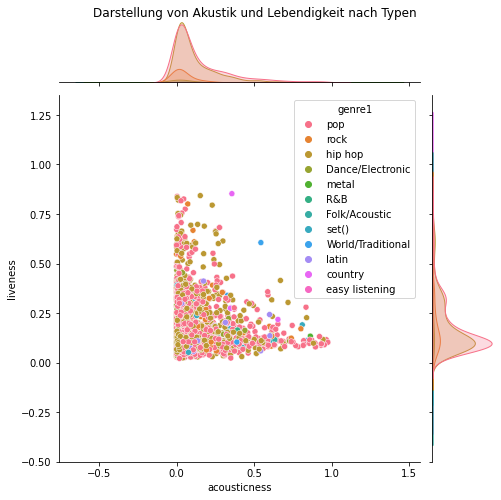

In [47]:
jp1= sns.jointplot(data=df, x="acousticness", y="liveness", hue="genre1")

plt.suptitle("Darstellung von Akustik und Lebendigkeit nach Typen",y=1) 

jp1.fig.set_figwidth(7)
jp1.fig.set_figheight(7)

plt.show()

**Die Liedzeiten wurden von Millisekunden auf Minuten/Sekunden/Millisekunden geändert**


In [48]:
def convert_from_ms( milliseconds ): 
	seconds, milliseconds = divmod(milliseconds,1000) 
	minutes, seconds = divmod(seconds, 60) 
  
	return str(minutes) + ":"+ str(seconds) + "."+ str(milliseconds)


In [49]:
duration_min = []
for i in df['duration_ms']:
  converted_time = convert_from_ms(i)
  datetime_object = datetime.strptime(converted_time, '%M:%S.%f').time()
  duration_min.append(datetime_object )

df.insert(df.columns.get_loc("duration_ms"),"duration (min:sec.ms)",duration_min)
df

,artist,song,duration (min:sec.ms),duration_ms,explicit,year,popularity,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,genre,genre1,genre2,genre3,genre4
0,Britney Spears,Oops!...I Did It Again,00:03:31.160000,211160,False,2000,77,0.751,0.834,1,...,0.3000,0.000018,0.3550,0.894,95.053,pop,pop,None,None,None
1,blink-182,All The Small Things,00:02:47.660000,167066,False,1999,79,0.434,0.897,0,...,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",rock,pop,None,None
2,Faith Hill,Breathe,00:04:10.546000,250546,False,1999,66,0.529,0.496,7,...,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",pop,country,None,None
3,Bon Jovi,It's My Life,00:03:44.493000,224493,False,2000,78,0.551,0.913,0,...,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",rock,metal,None,None
4,*NSYNC,Bye Bye Bye,00:03:20.560000,200560,False,2000,65,0.614,0.928,8,...,0.0408,0.001040,0.0845,0.879,172.656,pop,pop,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,00:03:01.260000,181026,False,2019,79,0.842,0.734,1,...,0.0427,0.000000,0.1060,0.952,137.958,pop,pop,None,None,None
1996,Taylor Swift,Cruel Summer,00:02:58.426000,178426,False,2019,78,0.552,0.702,9,...,0.1170,0.000021,0.1050,0.564,169.994,pop,pop,None,None,None
1997,Blanco Brown,The Git Up,00:03:20.593000,200593,False,2019,69,0.847,0.678,9,...,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",hip hop,country,None,None
1998,Sam Smith,Dancing With A Stranger (with Normani),00:02:51.290000,171029,False,2019,75,0.741,0.520,8,...,0.4500,0.000002,0.2220,0.347,102.998,pop,pop,None,None,None


In [50]:
df.dtypes

artist                    object
song                      object
duration (min:sec.ms)     object
duration_ms                int64
explicit                    bool
year                       int64
popularity                 int64
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                       int64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
genre                     object
genre1                    object
genre2                    object
genre3                    object
genre4                    object
dtype: object

**Alle Lieder in Dataframe, die ungeeignet für Kinder sind.**

In [51]:
df2 = df[df['explicit'] == True]
df2

,artist,song,duration (min:sec.ms),duration_ms,explicit,year,popularity,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,genre,genre1,genre2,genre3,genre4
5,Sisqo,Thong Song,00:04:13.733000,253733,True,1999,69,0.706,0.888,2,...,0.1190,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B",hip hop,pop,R&B,None
6,Eminem,The Real Slim Shady,00:04:44.200000,284200,True,2000,86,0.949,0.661,5,...,0.0302,0.000000,0.0454,0.760,104.504,hip hop,hip hop,None,None,None
19,Dr. Dre,The Next Episode,00:02:41.506000,161506,True,1999,82,0.922,0.909,10,...,0.0281,0.000000,0.0856,0.309,95.295,hip hop,hip hop,None,None,None
23,M.O.P.,Cold as Ice,00:04:04.466000,244466,True,2000,54,0.656,0.880,11,...,0.0421,0.000000,0.2940,0.758,85.565,hip hop,hip hop,None,None,None
27,Da Brat,What'chu Like (feat. Tyrese),00:03:41.160000,221160,True,2000,53,0.879,0.681,10,...,0.0170,0.000000,0.0669,0.817,99.974,"hip hop, pop, R&B",hip hop,pop,R&B,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,Post Malone,Better Now,00:03:51.266000,231266,True,2018,80,0.680,0.578,10,...,0.3310,0.000000,0.1350,0.341,145.038,hip hop,hip hop,None,None,None
1985,Ed Sheeran,Cross Me (feat. Chance the Rapper & PnB Rock),00:03:26.186000,206186,True,2019,64,0.746,0.787,4,...,0.2140,0.000000,0.0669,0.607,95.005,pop,pop,None,None,None
1987,iann dior,gone girl,00:02:16.568000,136568,True,2019,69,0.677,0.714,11,...,0.1620,0.000000,0.0717,0.355,94.956,"hip hop, pop",hip hop,pop,None,None
1991,NSG,Options,00:04:00.810000,240081,True,2020,57,0.836,0.621,1,...,0.3890,0.000092,0.1040,0.762,101.993,"World/Traditional, hip hop",World/Traditional,hip hop,None,None


Verteilung der Musik nach Genres im Laufe der Jahre

<ipython-input-52-4a812c730d8f>:15: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend= plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),


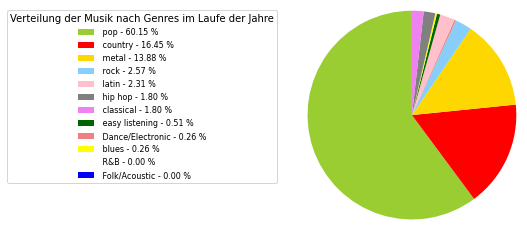

In [52]:
x = np.char.array([' pop', ' country', ' metal', ' rock', ' R&B', ' Dance/Electronic', ' Folk/Acoustic', ' latin', ' easy listening', ' blues', ' hip hop', ' classical'])
y = np.array([234, 64, 54,10, 0, 1, 0, 9, 2, 1, 7, 7])
colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

legend= plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
legend.set_title("Verteilung der Musik nach Genres im Laufe der Jahre")
plt.savefig('piechart.png', bbox_inches='tight')

**Energie ,Popularität und Tanzbarkeit Grafik**

Text(0, 0.5, 'Tanzbarkeit')

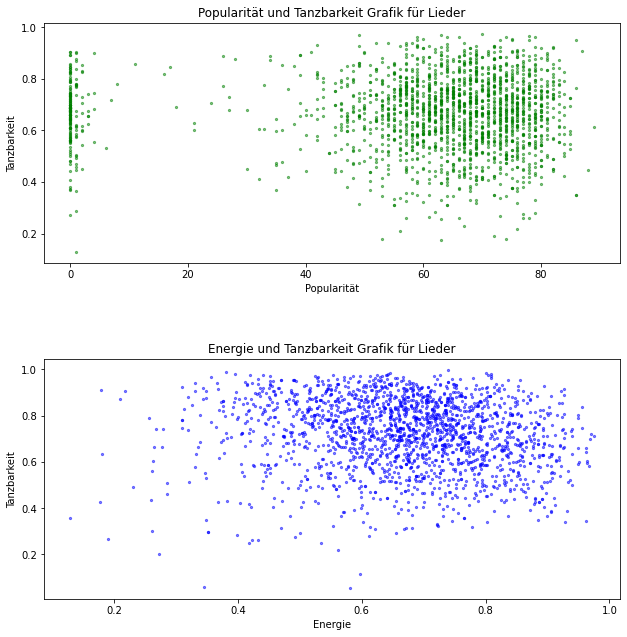

In [53]:
fig, axes = plt.subplots(2 , figsize=(10,10))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
#print(axes)
#Erste Grafik 
axes[0].scatter (df.popularity,df.danceability,alpha=0.5 , s=5 ,color ="green" )
axes[0].set_title("Popularität und Tanzbarkeit Grafik für Lieder")
axes[0].set_xlabel("Popularität")
axes[0].set_ylabel("Tanzbarkeit")
#Zweite Grafik
axes[1].scatter (df.danceability,df.energy,alpha=0.5 , s=5,color ="blue")
axes[1].set_title("Energie und Tanzbarkeit Grafik für Lieder")
axes[1].set_xlabel("Energie")
axes[1].set_ylabel("Tanzbarkeit")




Combine two attributes 


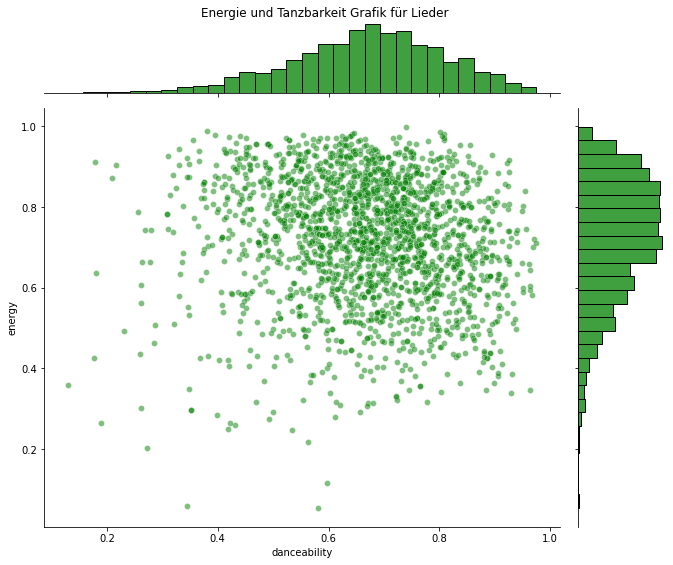

In [54]:
jp = sns.jointplot(x = 'danceability', y = 'energy', data = df, color= "Green", alpha=.5)

plt.suptitle("Energie und Tanzbarkeit Grafik für Lieder",y=1) 

jp.fig.set_figwidth(10)
jp.fig.set_figheight(8)

plt.show()

Popularity değeri 85 den büyük olan 

In [55]:
data =  df[df["popularity"] > 80]
data

,artist,song,duration (min:sec.ms),duration_ms,explicit,year,popularity,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,genre,genre1,genre2,genre3,genre4
6,Eminem,The Real Slim Shady,00:04:44.200000,284200,True,2000,86,0.949,0.661,5,...,0.03020,0.000000,0.0454,0.760,104.504,hip hop,hip hop,None,None,None
19,Dr. Dre,The Next Episode,00:02:41.506000,161506,True,1999,82,0.922,0.909,10,...,0.02810,0.000000,0.0856,0.309,95.295,hip hop,hip hop,None,None,None
20,Linkin Park,In the End,00:03:36.880000,216880,False,2000,83,0.556,0.864,3,...,0.00958,0.000000,0.2090,0.400,105.143,"rock, metal",rock,metal,None,None
102,Eminem,Stan,00:06:44.106000,404106,True,2000,83,0.780,0.768,6,...,0.03710,0.000002,0.5180,0.507,80.063,hip hop,hip hop,None,None,None
130,Outkast,Ms. Jackson,00:04:30.506000,270506,True,2000,82,0.843,0.806,4,...,0.14300,0.000000,0.0771,0.613,94.948,"hip hop, pop",hip hop,pop,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,Alec Benjamin,Let Me Down Slowly,00:02:49.353000,169353,False,2018,82,0.652,0.557,1,...,0.74000,0.000000,0.1240,0.483,150.073,"rock, pop, Dance/Electronic",rock,pop,Dance/Electronic,None
1921,Travis Scott,SICKO MODE,00:05:12.820000,312820,True,2018,81,0.834,0.730,8,...,0.00513,0.000000,0.1240,0.446,155.008,"hip hop, Dance/Electronic",hip hop,Dance/Electronic,None,None
1929,Billie Eilish,lovely (with Khalid),00:03:20.185000,200185,False,2018,86,0.351,0.296,4,...,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic",pop,Dance/Electronic,None,None
1960,Bad Bunny,Callaita,00:04:10.533000,250533,True,2019,81,0.610,0.624,2,...,0.60000,0.000002,0.2430,0.244,176.169,latin,latin,None,None,None


[Text(0.5, 1.0, 'Popularity and Energy Grafik'),
 Text(0.5, 0, 'Popularity'),
 Text(0, 0.5, 'Energy')]

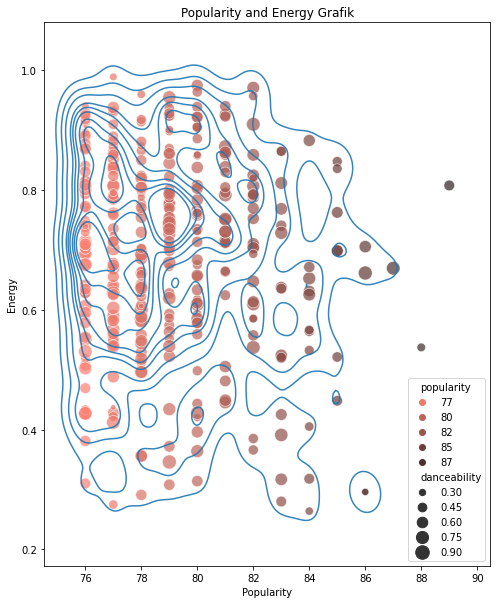

In [56]:
fig2 = plt.figure(figsize=(8,10))
p = sns.scatterplot(data=df[ df.popularity >75], x="popularity",y="energy", size="danceability", sizes=(20,200), alpha= .7, 
                    hue = 'popularity', palette='dark:salmon_r')
sns.kdeplot(data=df[ df.popularity >75], x="popularity",y="energy", bw_adjust=.5, alpha =.9)

plt.gca().update(dict(title='Popularity and Energy Grafik', xlabel='Popularity', ylabel='Energy'))